# Load data and split

In [ ]:
df3 = pd.read_csv("")
df3.info()
from sklearn.model_selection import train_test_split

X = df3.drop(columns=['Default','UserID','DOB','St','FirstName','LastName','LP'], axis=1) #.select_dtypes(['number'])
y = df3['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train['S'] = X_train['S'].astype('category')
X_train['C'] = X_train['C'].astype('category')
X_train['P'] = X_train['P'].astype('category')

In [12]:

# List of specific categorical columns to check
categorical_columns_to_check = ['S','C', 'p']

# Find categorical values in X_train but missing in X_test
for column in categorical_columns_to_check:
    unique_values_train = set(X_train[column].unique())
    unique_values_test = set(X_test[column].unique())
    values_missing_in_test = unique_values_train - unique_values_test

    if values_missing_in_test:
        print(f"Categorical values missing in X_test for column {column}: {values_missing_in_test}")

# Find categorical values in X_test but missing in X_train
for column in categorical_columns_to_check:
    unique_values_train = set(X_train[column].unique())
    unique_values_test = set(X_test[column].unique())
    values_missing_in_train = unique_values_test - unique_values_train

    if values_missing_in_train:
        print(f"Categorical values missing in X_train for column {column}: {values_missing_in_train}")


In [ ]:
# List of categorical features to one-hot encode
categorical_features = ['S', 'C', 'P']

# Apply one-hot encoding to the specified categorical features'
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)

# Display the resulting DataFrame
pd.options.display.max_columns = None  # remove the limit on the number of columns by default 'only 20 are shown'
X_train.head()

# Baseline model

In [120]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

baseline_model = RandomForestClassifier()

# evaluation metrics
scoring = {
    'AUC': 'roc_auc',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score)
}

# cross-validation on the training data with multiple metrics
baseline_scores = cross_validate(baseline_model, X_train, y_train, cv=10, scoring=scoring)

# Print the mean scores of the baseline model for each metric
print("Baseline Model Mean AUC:", baseline_scores['test_AUC'].mean())
print("Baseline Model Mean Precision:", baseline_scores['test_Precision'].mean())
print("Baseline Model Mean Recall:", baseline_scores['test_Recall'].mean())
print("Baseline Model Mean F1 Score:", baseline_scores['test_F1'].mean())
print("Baseline Model Mean Accuracy:", baseline_scores['test_Accuracy'].mean())




Baseline Model Mean AUC: 0.8230484165543264
Baseline Model Mean Precision: 0.4978537896028821
Baseline Model Mean Recall: 0.20869820746400233
Baseline Model Mean F1 Score: 0.2925857982592811
Baseline Model Mean Accuracy: 0.828125


In [122]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# list of models
models = {
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
}

# evaluation metrics
scoring = {
    'AUC': 'roc_auc',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score)
}

# Evaluate each model
for model_name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

    print(f"{model_name} Mean AUC:", scores['test_AUC'].mean())
    print(f"{model_name} Mean Precision:", scores['test_Precision'].mean())
    print(f"{model_name} Mean Recall:", scores['test_Recall'].mean())
    print(f"{model_name} Mean F1 Score:", scores['test_F1'].mean())
    print(f"{model_name} Mean Accuracy:", scores['test_Accuracy'].mean())
    print("\n")

AdaBoost Mean AUC: 0.8454020139186195
AdaBoost Mean Precision: 0.5445117383546716
AdaBoost Mean Recall: 0.29002350866882165
AdaBoost Mean F1 Score: 0.37617229173084804
AdaBoost Mean Accuracy: 0.835625


XGBoost Mean AUC: 0.8073047303794031
XGBoost Mean Precision: 0.4437691625509056
XGBoost Mean Recall: 0.2996473699676756
XGBoost Mean F1 Score: 0.35593342149202006
XGBoost Mean Accuracy: 0.8152083333333332




# Feature engineering

In [ ]:
df3 = pd.read_csv("")
df3.info()
from sklearn.model_selection import train_test_split

X = df3.drop(columns=['Default','UserID','DOB','St','FirstName','LastName','LP'], axis=1) #.select_dtypes(['number'])
y = df3['Default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
X_train['Sex'] = X_train['Sex'].astype('category')
X_train['City'] = X_train['City'].astype('category')
X_train['Purpose'] = X_train['Purpose'].astype('category')
X_train['DateOfBirth'] = pd.to_datetime(X_train['DateOfBirth'])

In [ ]:
# feature engineering... adding two feature --> age and AgeCategory
import pandas as pd
from datetime import datetime

# Convert 'DateOfBirth' to datetime format
X_train['DateOfBirth'] = pd.to_datetime(X_train['DateOfBirth'])

# Calculate age based on the current date
current_date = datetime.now()
X_train['Age'] = (current_date - X_train['DateOfBirth']).astype('<m8[Y]')

# Define age categories
bins = [-float('inf'), 14, 24, 64, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']

# Create 'AgeCategory' column
X_train['AgeCategory'] = pd.cut(X_train['Age'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new columns
print(X_train[['DateOfBirth', 'Age', 'AgeCategory']])

In [238]:
X_train['PreviousDefault'].value_counts()

0    4703
1      97
Name: PreviousDefault, dtype: int64

In [239]:
# feature engineering... adding another feature so total 3 features has been added--> PreviousDefaultStatus
import numpy as np
X_train['PreviousDefaultStatus'] = np.where(X_train['PreviousDefault'] == 0, 'LowRisk', 'HighRisk')


In [240]:
X_train['PreviousDefaultStatus'] = X_train['PreviousDefaultStatus'].astype('category')
X_train['AgeCategory'] = X_train['AgeCategory'].astype('category')

In [ ]:
# List of categorical features to one-hot encode
categorical_features1 = ['Sex', 'City', 'Purpose','AgeCategory','PreviousDefaultStatus']

# Apply one-hot encoding to the specified categorical features'
X_train = pd.get_dummies(X_train, columns=categorical_features1, drop_first=True)

# Display the resulting DataFrame
pd.options.display.max_columns = None  # remove the limit on the number of columns by default 'only 20 are shown'
X_train.head()

In [242]:
X_train = X_train.drop(columns=['DateOfBirth'], axis=1)

In [243]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

RFC = RandomForestClassifier()

# evaluation metrics
scoring = {
    'AUC': 'roc_auc',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score)
}

# cross-validation on the training data with multiple metrics
RFC_scores = cross_validate(RFC, X_train, y_train, cv=5, scoring=scoring)

# mean scores of the baseline model for each metric
print("RFC Model Mean AUC:", RFC_scores['test_AUC'].mean())
print("RFC Model Mean Precision:", RFC_scores['test_Precision'].mean())
print("RFC Model Mean Recall:", RFC_scores['test_Recall'].mean())
print("RFC Model Mean F1 Score:", RFC_scores['test_F1'].mean())
print("RFC Model Mean Accuracy:", RFC_scores['test_Accuracy'].mean())

RFC Model Mean AUC: 0.910673658989514
RFC Model Mean Precision: 0.7351001207205978
RFC Model Mean Recall: 0.521929046563193
RFC Model Mean F1 Score: 0.6084175574780688
RFC Model Mean Accuracy: 0.8856250000000001


In [244]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Create a list of models
models = {
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
}

# Define the evaluation metrics
scoring = {
    'AUC': 'roc_auc',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score)
}

# Evaluate each model
for model_name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)

    print(f"{model_name} Mean AUC:", scores['test_AUC'].mean())
    print(f"{model_name} Mean Precision:", scores['test_Precision'].mean())
    print(f"{model_name} Mean Recall:", scores['test_Recall'].mean())
    print(f"{model_name} Mean F1 Score:", scores['test_F1'].mean())
    print(f"{model_name} Mean Accuracy:", scores['test_Accuracy'].mean())
    print("\n")

AdaBoost Mean AUC: 0.9232570336271857
AdaBoost Mean Precision: 0.6933527394456412
AdaBoost Mean Recall: 0.5776940133037695
AdaBoost Mean F1 Score: 0.629768467991991
AdaBoost Mean Accuracy: 0.8837499999999998


XGBoost Mean AUC: 0.9064714849984721
XGBoost Mean Precision: 0.6476775144964568
XGBoost Mean Recall: 0.5777531411677753
XGBoost Mean F1 Score: 0.6084447254622585
XGBoost Mean Accuracy: 0.8733333333333334




# Adding feature selection

In [245]:
from sklearn.feature_selection import SelectKBest, f_classif

ADA = AdaBoostClassifier()
ADA.fit(X_train, y_train)

# Get feature importances
feature_importances = ADA.feature_importances_

# Use SelectKBest to select top k features based on ANOVA F-statistic
k_best = 30  # Adjust as needed
selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:", selected_feature_names)

Selected Features: Index(['PreviousDefault', 'PreviousAccounts', 'ResidenceDuration', 'Amount',
       'Married', 'Duration', 'Age', 'Sex_M', 'City_East Jessetown',
       'City_Ericmouth', 'City_Herrerafurt', 'City_Jacquelineland',
       'City_Lake Chad', 'City_Lake Debra', 'City_Lake Roberto',
       'City_Lisatown', 'City_New Jessica', 'City_New Roberttown',
       'City_North Noahstad', 'City_Port Jesseville', 'City_Port Keith',
       'City_Ramirezstad', 'Purpose_Education', 'Purpose_Household',
       'Purpose_NewCar', 'Purpose_Other', 'Purpose_Vacation',
       'AgeCategory_Adult', 'AgeCategory_Senior',
       'PreviousDefaultStatus_LowRisk'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# after feature  engineering and new feature such as age has really positive impact on model performance which has improved model significantly
import matplotlib.pyplot as plt
import numpy as np

# Plot the feature importances
plt.figure(figsize=(20, 6))
plt.bar(range(len(selected_feature_indices)), feature_importances[selected_feature_indices], align='center')
plt.xticks(range(len(selected_feature_indices)), selected_feature_names, rotation=45)
plt.xlabel('Selected Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances - AdaBoostClassifier (Selected Features)')
plt.show()

In [247]:
# Select only specific features
selected_features = ['PreviousDefault', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration', 'Age']
X_train_selected = X_train[selected_features]

# Create a list of models
models = {
    'AdaBoost': AdaBoostClassifier(),
}

# Define the evaluation metrics
scoring = {
    'AUC': 'roc_auc',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score)
}

# Evaluate each model
for model_name, model in models.items():
    scores = cross_validate(model, X_train_selected, y_train, cv=5, scoring=scoring)

    print(f"{model_name} Mean AUC:", scores['test_AUC'].mean())
    print(f"{model_name} Mean Precision:", scores['test_Precision'].mean())
    print(f"{model_name} Mean Recall:", scores['test_Recall'].mean())
    print(f"{model_name} Mean F1 Score:", scores['test_F1'].mean())
    print(f"{model_name} Mean Accuracy:", scores['test_Accuracy'].mean())
    print("\n")

AdaBoost Mean AUC: 0.9237882853842114
AdaBoost Mean Precision: 0.706319587586276
AdaBoost Mean Recall: 0.5764966740576496
AdaBoost Mean F1 Score: 0.6341466093690865
AdaBoost Mean Accuracy: 0.8860416666666666




In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Train a RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

# Get feature importances
feature_importances = RFC.feature_importances_

# Use SelectKBest to select top k features based on ANOVA F-statistic
k_best = 30  # Adjust as needed
selector = SelectKBest(score_func=f_classif, k=k_best)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train.columns[selected_feature_indices]

# Print the selected feature names
print("Selected Features:", selected_feature_names)


Selected Features: Index(['PreviousDefault', 'PreviousAccounts', 'ResidenceDuration', 'Amount',
       'Married', 'Duration', 'Age', 'Sex_M', 'City_East Jessetown',
       'City_Ericmouth', 'City_Herrerafurt', 'City_Jacquelineland',
       'City_Lake Chad', 'City_Lake Debra', 'City_Lake Roberto',
       'City_Lisatown', 'City_New Jessica', 'City_New Roberttown',
       'City_North Noahstad', 'City_Port Jesseville', 'City_Port Keith',
       'City_Ramirezstad', 'Purpose_Education', 'Purpose_Household',
       'Purpose_NewCar', 'Purpose_Other', 'Purpose_Vacation',
       'AgeCategory_Adult', 'AgeCategory_Senior',
       'PreviousDefaultStatus_LowRisk'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [35] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# after feature  engineering and new feature such as age has really positive impact on model performance which has improved model significantly
import matplotlib.pyplot as plt
import numpy as np

# Plot the feature importances
plt.figure(figsize=(20, 6))
plt.bar(range(len(selected_feature_indices)), feature_importances[selected_feature_indices], align='center')
plt.xticks(range(len(selected_feature_indices)), selected_feature_names, rotation=45)
plt.xlabel('Selected Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importances - AdaBoostClassifier (Selected Features)')
plt.show()

In [250]:
# Select only specific features
selected_features = ['PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration', 'Age', 'Sex_M']
X_train_selected = X_train[selected_features]

# Initialize the RandomForestClassifier
RFC = RandomForestClassifier()

# Define the evaluation metrics
scoring = {
    'AUC': 'roc_auc',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score)
}

# Cross-validation on the training data with multiple metrics
RFC_scores = cross_validate(RFC, X_train_selected, y_train, cv=5, scoring=scoring)

# Print the mean scores of the model for each metric
print("RFC Model Mean AUC:", RFC_scores['test_AUC'].mean())
print("RFC Model Mean Precision:", RFC_scores['test_Precision'].mean())
print("RFC Model Mean Recall:", RFC_scores['test_Recall'].mean())
print("RFC Model Mean F1 Score:", RFC_scores['test_F1'].mean())
print("RFC Model Mean Accuracy:", RFC_scores['test_Accuracy'].mean())


RFC Model Mean AUC: 0.9093868333834265
RFC Model Mean Precision: 0.6796694794307688
RFC Model Mean Recall: 0.5461862527716186
RFC Model Mean F1 Score: 0.6046697593063175
RFC Model Mean Accuracy: 0.8779166666666667


# Adding hyperparameter tuning

In [108]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state=42)

params = {
      'n_estimators': [100, 200, 300, 400, 500, 600],
      'max_depth': [2, 5, 10, 20, None],
}

search = GridSearchCV(RFC, params, scoring='roc_auc', cv=5, verbose=1)
search = search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [109]:
search.best_score_

0.9160658019513214

In [110]:
search.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [113]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

RFC = RandomForestClassifier(n_estimators=600)

# evaluation metrics
scoring = {
    'AUC': 'roc_auc',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'F1_macro': 'f1_macro',  # This line adds f1_macro to the scoring metrics
    'Accuracy': make_scorer(accuracy_score)
}

# cross-validation on the training data with multiple metrics
RFC_scores = cross_validate(RFC, X_train, y_train, cv=5, scoring=scoring)

# mean scores of the baseline model for each metric
print("RFC Model Mean AUC:", RFC_scores['test_AUC'].mean())
print("RFC Model Mean Precision:", RFC_scores['test_Precision'].mean())
print("RFC Model Mean Recall:", RFC_scores['test_Recall'].mean())
print("RFC Model Mean F1 Score:", RFC_scores['test_F1'].mean())
print("RFC Model Mean F1 Macro:", RFC_scores['test_F1_macro'].mean())  # This line prints the mean F1_macro score
print("RFC Model Mean Accuracy:", RFC_scores['test_Accuracy'].mean())


RFC Model Mean AUC: 0.9137466211965058
RFC Model Mean Precision: 0.7263750304207081
RFC Model Mean Recall: 0.523141167775314
RFC Model Mean F1 Score: 0.6056815628562983
RFC Model Mean F1 Macro: 0.7689463604265334
RFC Model Mean Accuracy: 0.884375


In [251]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Select only specific features
selected_features = ['PreviousDefault', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration', 'Age']
X_train_selected = X_train[selected_features]

# Initialize the AdaBoostClassifier
ABC = AdaBoostClassifier(random_state=42)

# Define the hyperparameter grid
params = {
    'n_estimators': [100, 200, 300, 400, 500, 600],
}

# Perform GridSearchCV
search = GridSearchCV(ABC, params, scoring='roc_auc', cv=5, verbose=1)
search = search.fit(X_train_selected, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [252]:
search.best_score_

0.9239661686343368

In [253]:
search.best_params_

{'n_estimators': 100}

In [254]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Select only specific features
selected_features = ['PreviousDefault', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration', 'Age']
X_train_selected = X_train[selected_features]

# Create a list of models
models = {
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
}

# Define the evaluation metrics
scoring = {
    'AUC': 'roc_auc',
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score),
    'F1': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score)
}

# Evaluate each model
for model_name, model in models.items():
    scores = cross_validate(model, X_train_selected, y_train, cv=5, scoring=scoring)

    print(f"{model_name} Mean AUC:", scores['test_AUC'].mean())
    print(f"{model_name} Mean Precision:", scores['test_Precision'].mean())
    print(f"{model_name} Mean Recall:", scores['test_Recall'].mean())
    print(f"{model_name} Mean F1 Score:", scores['test_F1'].mean())
    print(f"{model_name} Mean Accuracy:", scores['test_Accuracy'].mean())
    print("\n")


AdaBoost Mean AUC: 0.9239661686343368
AdaBoost Mean Precision: 0.6999903907206013
AdaBoost Mean Recall: 0.5765114560236511
AdaBoost Mean F1 Score: 0.6314284068900876
AdaBoost Mean Accuracy: 0.8847916666666666




 # Performance on testing data

In [256]:
X_test['Sex'] = X_test['Sex'].astype('category')
X_test['City'] = X_test['City'].astype('category')
X_test['Purpose'] = X_test['Purpose'].astype('category')
X_test['DateOfBirth'] = pd.to_datetime(X_test['DateOfBirth'])

In [ ]:
# feature engineering... adding two feature --> age and AgeCategory
import pandas as pd
from datetime import datetime

# Convert 'DateOfBirth' to datetime format
X_test['DateOfBirth'] = pd.to_datetime(X_test['DateOfBirth'])

# Calculate age based on the current date
current_date = datetime.now()
X_test['Age'] = (current_date - X_test['DateOfBirth']).astype('<m8[Y]')

# Define age categories
bins = [-float('inf'), 14, 24, 64, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']

# Create 'AgeCategory' column
X_test['AgeCategory'] = pd.cut(X_test['Age'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new columns
print(X_test[['DateOfBirth', 'Age', 'AgeCategory']])

In [258]:
X_test['PreviousDefault'].value_counts()

0    1181
1      19
Name: PreviousDefault, dtype: int64

In [259]:
import numpy as np
X_test['PreviousDefaultStatus'] = np.where(X_test['PreviousDefault'] == 0, 'LowRisk', 'HighRisk')

In [260]:
X_test['PreviousDefaultStatus'] = X_test['PreviousDefaultStatus'].astype('category')
X_test['AgeCategory'] = X_test['AgeCategory'].astype('category')

In [ ]:
# List of categorical features to one-hot encode
categorical_features1 = ['Sex', 'City', 'Purpose','AgeCategory','PreviousDefaultStatus']

# Apply one-hot encoding to the specified categorical features'
X_test = pd.get_dummies(X_test, columns=categorical_features1, drop_first=True)

# Display the resulting DataFrame
pd.options.display.max_columns = None  # remove the limit on the number of columns by default 'only 20 are shown'
X_test.head()

In [262]:
X_test = X_test.drop(columns=['DateOfBirth'], axis=1)

In [217]:
#train Randomforest model
RFC_model = RandomForestClassifier(n_estimators=600)
RFC_model.fit(X_train, y_train)

# Prediction probabilities for class 1
predicted_probabilities_rfc = RFC_model.predict_proba(X_test)[:, 1]

# Prediction labels using default threshold (0.5)
predictions_rfc_default_threshold = RFC_model.predict(X_test) 

# Print the first 5 probabilities, predicted classifications, and actual outcomes
print(predicted_probabilities_rfc[:5])  # first 5 probabilities
print(predictions_rfc_default_threshold[:5])  # predicted classifications using default threshold
print(y_test[:5])  # actual outcomes

[0.02833333 0.01166667 0.16       0.03666667 0.04833333]
[0 0 0 0 0]
1782    0
3917    0
221     0
2135    0
5224    0
Name: BadCredit, dtype: int64


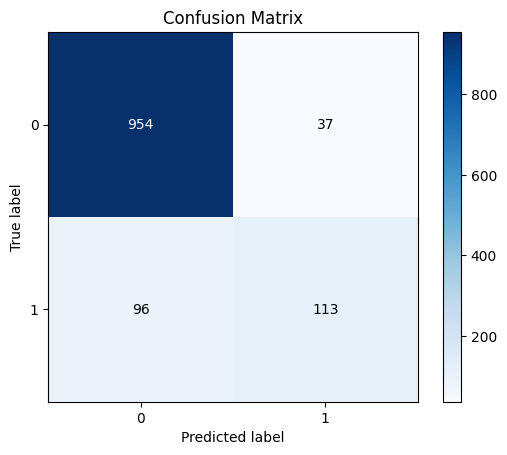

In [224]:
# Confusion Matrix visualizaton
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, predictions_rfc_default_threshold)
skplt.metrics.plot_confusion_matrix(y_test, predictions_rfc_default_threshold)
plt.show()


Accuracy: 0.889167
Precision: 0.753333
Recall: 0.540670
F-Measure: 0.629526


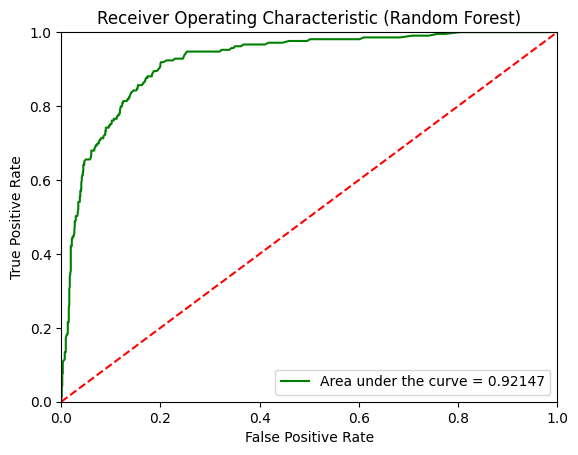

In [226]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

# Evaluation Metrics
accuracy_rfc = accuracy_score(y_test, predictions_rfc_default_threshold)
precision_rfc = precision_score(y_test, predictions_rfc_default_threshold)
recall_rfc = recall_score(y_test, predictions_rfc_default_threshold)
f1_score_rfc = f1_score(y_test, predictions_rfc_default_threshold)

# Print Metrics
print('Accuracy: %.6f' % accuracy_rfc)
print('Precision: %.6f' % precision_rfc)
print('Recall: %.6f' % recall_rfc)
print('F-Measure: %.6f' % f1_score_rfc)

# ROC Curve and AUC
roc_auc_rfc = roc_auc_score(y_test, predicted_probabilities_rfc)

# Plot ROC Curve
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, predicted_probabilities_rfc)
plt.plot(fpr_rfc, tpr_rfc, label='Area under the curve = %0.5f' % roc_auc_rfc, color="green")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [229]:
# Train AdaBoost model
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train, y_train)

# Prediction probabilities for class 1
predicted_probabilities_adaboost = adaboost_model.predict_proba(X_test)[:, 1]

# Prediction labels using default threshold (0.5)
predictions_adaboost_default_threshold = adaboost_model.predict(X_test)

# Print the first 5 probabilities, predicted classifications, and actual outcomes
print(predicted_probabilities_adaboost[:5])  # first 5 probabilities
print(predictions_adaboost_default_threshold[:5])  # predicted classifications using default threshold
print(y_test[:5])  # actual outcomes

[0.47957005 0.29999996 0.49472875 0.30897076 0.31388024]
[0 0 0 0 0]
1782    0
3917    0
221     0
2135    0
5224    0
Name: BadCredit, dtype: int64


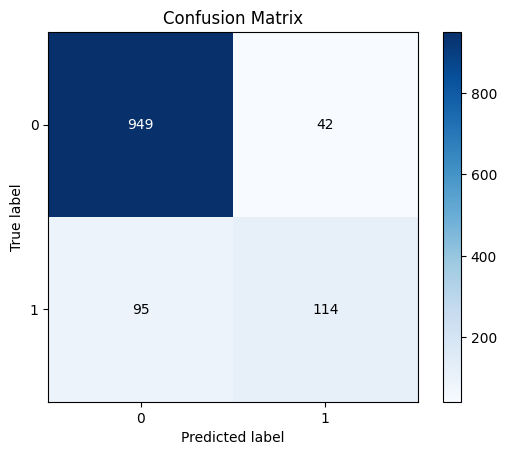

In [230]:
# Confusion Matrix visualizaton for AdaBoost
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

cnf_matrix_adaboost = confusion_matrix(y_test, predictions_adaboost_default_threshold)
skplt.metrics.plot_confusion_matrix(y_test, predictions_adaboost_default_threshold)
plt.show()

Accuracy: 0.885833
Precision: 0.730769
Recall: 0.545455
F-Measure: 0.624658


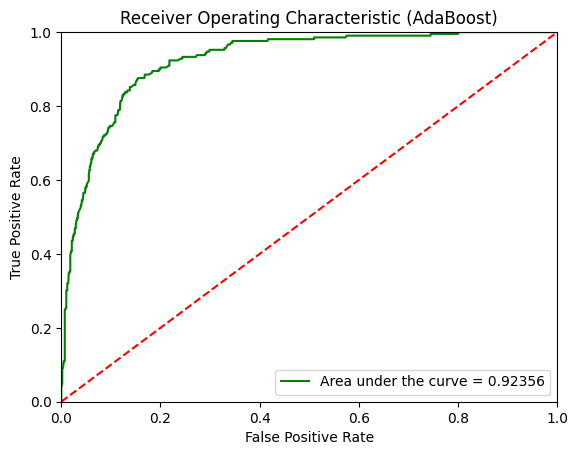

In [232]:
# Evaluation Metrics
accuracy_adaboost = accuracy_score(y_test, predictions_adaboost_default_threshold)
precision_adaboost = precision_score(y_test, predictions_adaboost_default_threshold)
recall_adaboost = recall_score(y_test, predictions_adaboost_default_threshold)
f1_score_adaboost = f1_score(y_test, predictions_adaboost_default_threshold)

# Print Metrics
print('Accuracy: %.6f' % accuracy_adaboost)
print('Precision: %.6f' % precision_adaboost)
print('Recall: %.6f' % recall_adaboost)
print('F-Measure: %.6f' % f1_score_adaboost)

# ROC Curve and AUC
roc_auc_adaboost = roc_auc_score(y_test, predicted_probabilities_adaboost)

# Plot ROC Curve
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, predicted_probabilities_adaboost)
plt.plot(fpr_adaboost, tpr_adaboost, label='Area under the curve = %0.5f' % roc_auc_adaboost, color="green")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AdaBoost)')
plt.legend(loc="lower right")
plt.show()

In [266]:
# Select only specific features
selected_features = ['PreviousDefault', 'PreviousAccounts', 'ResidenceDuration', 'Amount', 'Married', 'Duration', 'Age']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train AdaBoost model
adaboost_model = AdaBoostClassifier(n_estimators=100)
adaboost_model.fit(X_train_selected, y_train)

# Prediction probabilities for class 1
predicted_probabilities_adaboost = adaboost_model.predict_proba(X_test_selected)[:, 1]

# Prediction labels using default threshold (0.5)
predictions_adaboost_default_threshold = adaboost_model.predict(X_test_selected)

# Print the first 5 probabilities, predicted classifications, and actual outcomes
print(predicted_probabilities_adaboost[:5])  # first 5 probabilities
print(predictions_adaboost_default_threshold[:5])  # predicted classifications using default threshold
print(y_test[:5])  # actual outcomes


[0.4902725  0.39390346 0.49754417 0.39887563 0.40847747]
[0 0 0 0 0]
1782    0
3917    0
221     0
2135    0
5224    0
Name: BadCredit, dtype: int64


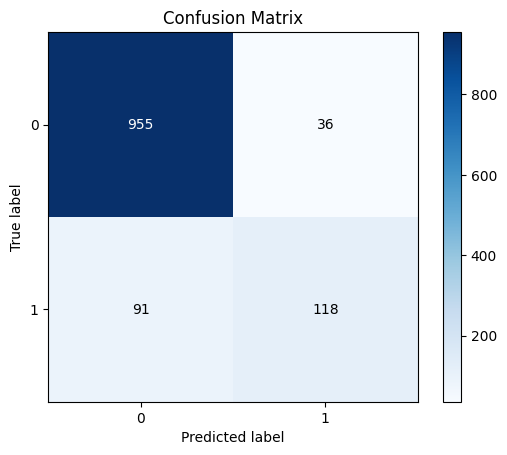

In [267]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt

# Confusion Matrix visualizaton for AdaBoost with selected features
cnf_matrix_adaboost = confusion_matrix(y_test, predictions_adaboost_default_threshold)
skplt.metrics.plot_confusion_matrix(y_test, predictions_adaboost_default_threshold)
plt.show()


Accuracy: 0.894167
Precision: 0.766234
Recall: 0.564593
F-Measure: 0.650138


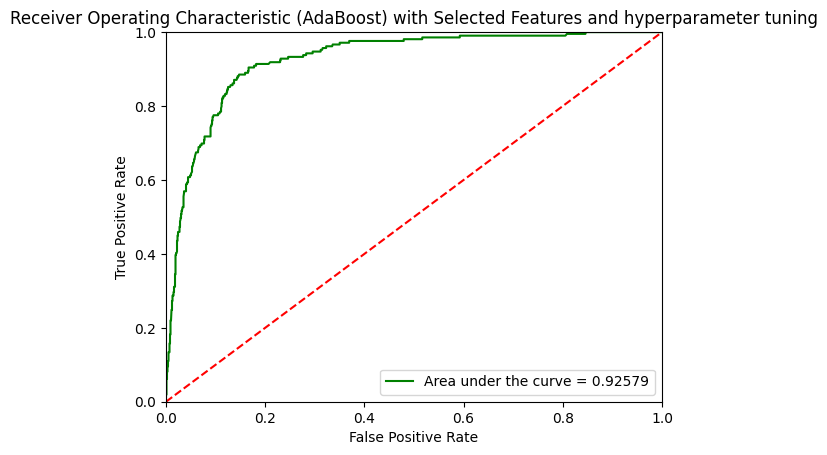

In [269]:
# Evaluation Metrics for AdaBoost with selected features
accuracy_adaboost = accuracy_score(y_test, predictions_adaboost_default_threshold)
precision_adaboost = precision_score(y_test, predictions_adaboost_default_threshold)
recall_adaboost = recall_score(y_test, predictions_adaboost_default_threshold)
f1_score_adaboost = f1_score(y_test, predictions_adaboost_default_threshold)

# Print Metrics
print('Accuracy: %.6f' % accuracy_adaboost)
print('Precision: %.6f' % precision_adaboost)
print('Recall: %.6f' % recall_adaboost)
print('F-Measure: %.6f' % f1_score_adaboost)

# ROC Curve and AUC for AdaBoost with selected features
roc_auc_adaboost = roc_auc_score(y_test, predicted_probabilities_adaboost)

# Plot ROC Curve
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, predicted_probabilities_adaboost)
plt.plot(fpr_adaboost, tpr_adaboost, label='Area under the curve = %0.5f' % roc_auc_adaboost, color="green")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (AdaBoost) with Selected Features and hyperparameter tuning')
plt.legend(loc="lower right")
plt.show()


Final Summary of all steps. Best performing model on unseen test data  is Adaboost with selected features and hyperparameter tunning.

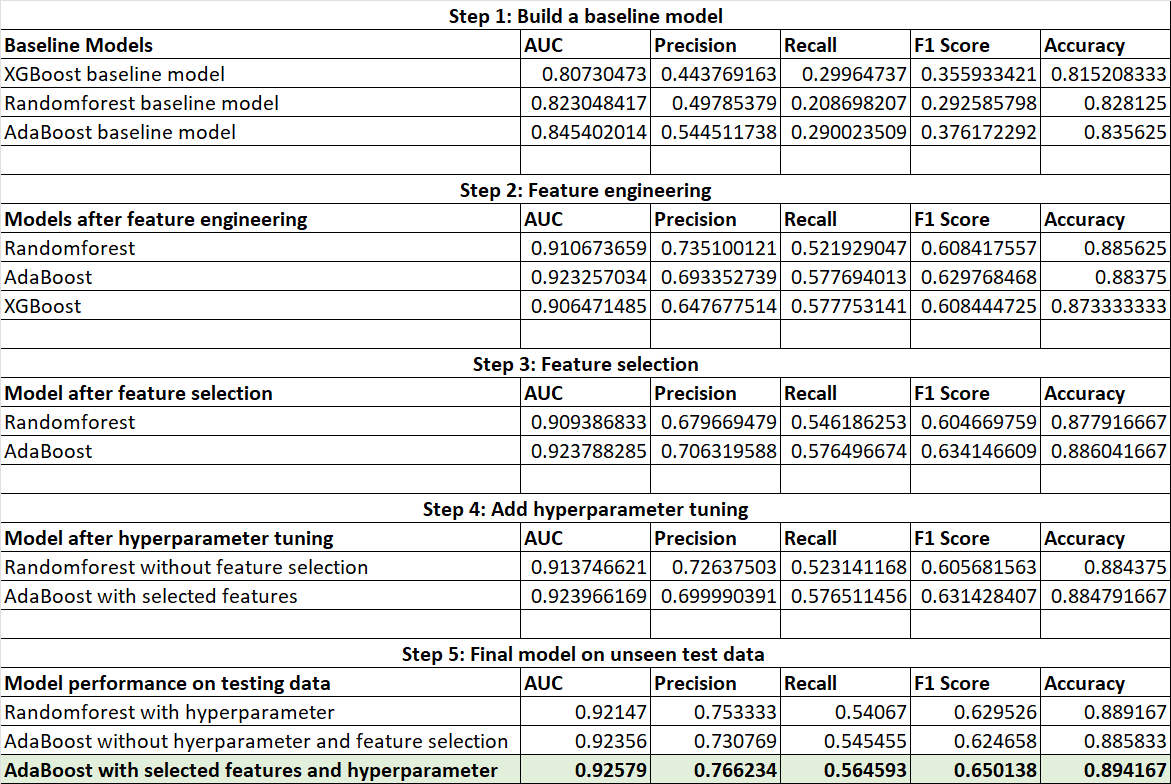